<a href="https://colab.research.google.com/github/aryannewyork/Machine-Learning-Algorithms/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import random
from time import process_time_ns, process_time

# Binary Classification Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Binary Classification/data_banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,authenticity
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Data Pre-Processing

In [ ]:
df.isnull().values.any()

False

In [ ]:
def normalizeCol(col):
  max = col.max()
  min = col.min()
  diff = max-min
  for x in range(len(col)):
    col[x] = (col[x]-min)/diff

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-1*z))

In [ ]:
for col in df:
  normalizeCol(df[col])

<ipython-input-5-b47179d3bff7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[x] = (col[x]-min)/diff


In [ ]:
labelCol = ['authenticity']
X = df[df.columns[~df.columns.isin(labelCol)]]
Y = df[labelCol]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)
X_train.insert(0, 'bias', 1)
X_test.insert(0, 'bias', 1)
X_train.head()

,bias,variance,skewness,curtosis,entropy
662,1,0.722274,0.844444,0.071088,0.652209
512,1,0.700005,0.917769,0.081276,0.398238
1193,1,0.236881,0.205110,0.671562,0.811878
682,1,0.776973,0.370036,0.372361,0.776722
1313,1,0.399101,0.241499,0.567954,0.889013


# Model Training Using TGD and SGD

In [ ]:
def log_regression_total_gradient_descent(X_train, Y_train, epochs):
  weights = np.zeros(len(X_train.columns))
  epochs = epochs
  learning_rate = 1e-5
  regularization = 1e-2
  for epoch in range(epochs):
    weights = weights - learning_rate*((Y_train.T - sigmoid(weights @ X_train.T))@X_train + regularization*weights)
  return weights

def log_regression_stochastic_gradient_descent(X_train, Y_train, iterations):
  weights = np.zeros(len(X_train.columns))
  iterations = iterations
  learning_rate = 1e-2
  regularization = 1e-2
  for iter in range(iterations):
    randomIndex = random.randint(0, len(X_train)-1)
    weights = weights - learning_rate*((Y_train.iloc[randomIndex].T - sigmoid(weights @ X_train.iloc[randomIndex].to_numpy().reshape(-1, 1)))@X_train.iloc[randomIndex].to_numpy().reshape(1, -1) + regularization*weights)
  return weights

def log_regression_batch_gradient_descent(X_train, Y_train, iterations, batchSize):
  weights = np.zeros(len(X_train.columns))
  iterations = iterations
  learning_rate = 1e-2
  regularization = 1e-2
  for iter in range(iterations):
    randomIndices = np.random.randint(len(X_train)-1, size=(batchSize))
    weights = weights - learning_rate*((Y_train.iloc[randomIndices].T - sigmoid(weights @ X_train.iloc[randomIndices].T.to_numpy()))@X_train.iloc[randomIndices].to_numpy() + regularization*weights)
    weights = weights.to_numpy()
  return weights.reshape(-1)

# Making Predictions

In [ ]:
def pred(weights, X_test, Y_test, threshold):
  pred = sigmoid(weights @ X_test.T).to_numpy()
  pred = pred.reshape(-1)
  for x in range(len(pred)):
    if(pred[x] > threshold):
      pred[x] = 1
    else:
      pred[x] = 0
  return accuracy_score(Y_test, pred)

TGD Time:  220288937 ns
SGD Time:  24720072 ns
BGD Time:  23830055 ns


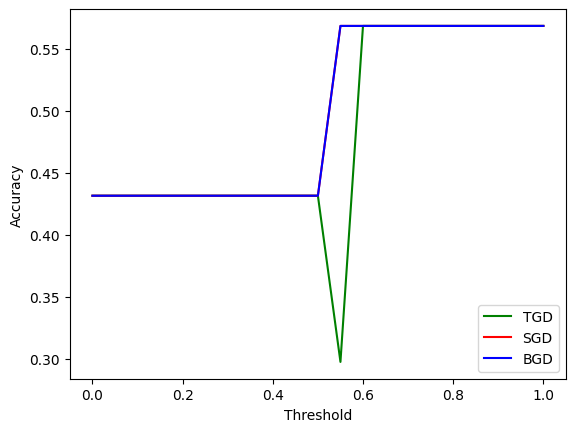

Accuracy for TGD is: 56.85131195335277 %
Accuracy for SGD is: 56.85131195335277 %
Accuracy for BGD is: 56.85131195335277 %


In [ ]:
start = process_time_ns()
w1 = log_regression_total_gradient_descent(X_train, Y_train, 100)
end = process_time_ns()
print('TGD Time: ', end-start, 'ns')

start = process_time_ns()
w2 = log_regression_batch_gradient_descent(X_train, Y_train, 10, 1)
end = process_time_ns()
print('SGD Time: ', end-start, 'ns')

start = process_time_ns()
w3 = log_regression_batch_gradient_descent(X_train, Y_train, 10, 10)
end = process_time_ns()
print('BGD Time: ', end-start, 'ns')

threshold = [0.0]
for i in range(20):
  threshold.append(np.round(threshold[-1]+0.05, 2))
score1 = []
score2 = []
score3 = []
for t in threshold:
  score1.append(pred(w1, X_test, Y_test, t))
for t in threshold:
  score2.append(pred(w2, X_test, Y_test, t))
for t in threshold:
  score3.append(pred(w3, X_test, Y_test, t))
plt.plot(threshold, score1, color='g', label='TGD')
plt.plot(threshold, score2, color='r', label='SGD')
plt.plot(threshold, score3, color='b', label='BGD')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.legend(['TGD', 'SGD', 'BGD'], loc='lower right')
plt.show()
print(f"Accuracy for TGD is: {max(score1)*100} %")
print(f"Accuracy for SGD is: {max(score2)*100} %")
print(f"Accuracy for BGD is: {max(score3)*100} %")

Text(0, 0.5, 'Accuracy')

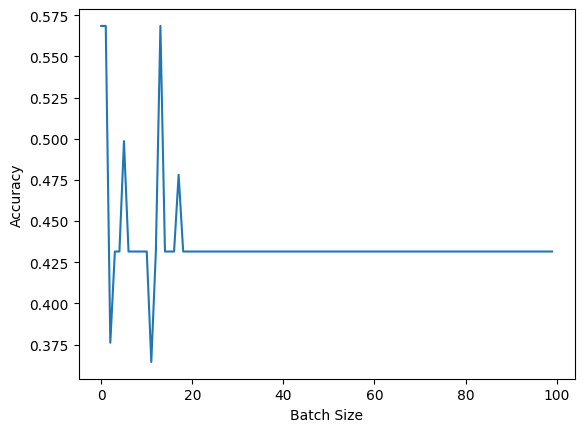

In [ ]:
time_BGD = []
score = []
batchSize = [i for i in range(100)]
for i in range(100):
  start = process_time()
  w3 = log_regression_batch_gradient_descent(X_train, Y_train, 10, i)
  score.append(pred(w3, X_test, Y_test, 0.5))
  end = process_time()
  time_BGD.append(end-start)
plt.plot(batchSize, score)
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend(['BGD'], loc='upper right')
plt.show()

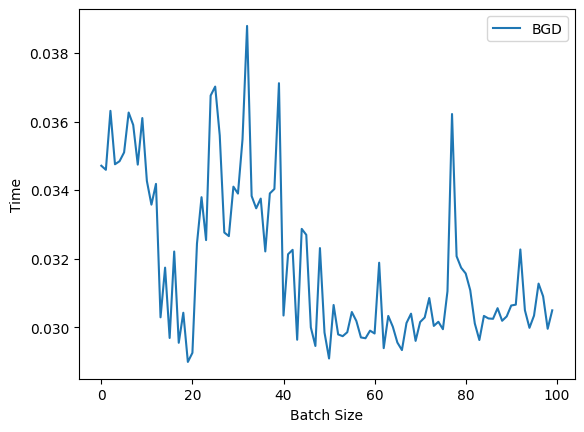

In [ ]:
plt.plot(batchSize, time_BGD)
plt.xlabel('Batch Size')
plt.ylabel('Time')
plt.legend(['BGD'], loc='upper right')
plt.show()